In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/Users/prakharsoni/Downloads/Final_Dataset.csv')
data

,DATE,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
0,01-01-1990,132.100,3166.8,5.4,4208.4,3730.7,8.23,61.6440,795.4
1,01-02-1990,132.700,3179.2,5.3,4236.3,3728.2,8.24,62.2108,798.1
2,01-03-1990,133.500,3190.1,5.2,4254.0,3754.9,8.28,62.5068,801.5
3,01-04-1990,134.000,3201.6,5.4,4290.8,3770.0,8.26,62.3597,806.1
4,01-05-1990,134.400,3200.6,5.4,4296.0,3775.8,8.18,62.5474,804.2
...,...,...,...,...,...,...,...,...,...
401,01-06-2023,308.309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,01-07-2023,308.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,01-08-2023,309.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,01-09-2023,310.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.dropna(inplace=True)
data.head(5)

,DATE,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
0,01-01-1990,132.1,3166.8,5.4,4208.4,3730.7,8.23,61.6440,795.4
1,01-02-1990,132.7,3179.2,5.3,4236.3,3728.2,8.24,62.2108,798.1
2,01-03-1990,133.5,3190.1,5.2,4254.0,3754.9,8.28,62.5068,801.5
3,01-04-1990,134.0,3201.6,5.4,4290.8,3770.0,8.26,62.3597,806.1
4,01-05-1990,134.4,3200.6,5.4,4296.0,3775.8,8.18,62.5474,804.2


In [4]:
data.shape

(361, 9)

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data.set_index('DATE', inplace=True)

In [6]:
data.describe()

,CPI,M2,UNRATE,DSPI,PCE,FEDFUNDS,INDPRO,M1SL
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,199.881108,7323.863158,5.835457,9409.742105,8546.113573,2.900720,88.436744,1751.786427
std,36.436173,3626.527307,1.598390,3504.037378,3198.159508,2.364899,13.277816,913.237494
min,132.100000,3166.800000,3.500000,4208.400000,3728.200000,0.070000,60.306900,795.400000
25%,169.700000,3923.900000,4.600000,6140.200000,5548.800000,0.380000,80.480000,1103.500000
50%,199.000000,6424.500000,5.500000,9109.500000,8504.400000,2.420000,92.345900,1364.400000
75%,229.970000,10051.800000,6.800000,12272.100000,11018.500000,5.240000,99.056700,2315.000000
max,266.626000,15396.000000,10.000000,16557.600000,14815.700000,8.290000,104.118100,4021.200000


In [7]:
# Finding Correleation

correlation = data.corr()
print(correlation)

               CPI        M2    UNRATE      DSPI       PCE  FEDFUNDS  \
CPI       1.000000  0.967636 -0.054046  0.994616  0.995890 -0.744227   
M2        0.967636  1.000000 -0.075678  0.983629  0.978824 -0.705426   
UNRATE   -0.054046 -0.075678  1.000000 -0.060461 -0.069239 -0.449224   
DSPI      0.994616  0.983629 -0.060461  1.000000  0.999033 -0.723268   
PCE       0.995890  0.978824 -0.069239  0.999033  1.000000 -0.720467   
FEDFUNDS -0.744227 -0.705426 -0.449224 -0.723268 -0.720467  1.000000   
INDPRO    0.892088  0.779691 -0.241255  0.863101  0.876861 -0.570950   
M1SL      0.894835  0.969862 -0.160391  0.918470  0.908665 -0.626234   

            INDPRO      M1SL  
CPI       0.892088  0.894835  
M2        0.779691  0.969862  
UNRATE   -0.241255 -0.160391  
DSPI      0.863101  0.918470  
PCE       0.876861  0.908665  
FEDFUNDS -0.570950 -0.626234  
INDPRO    1.000000  0.663047  
M1SL      0.663047  1.000000  


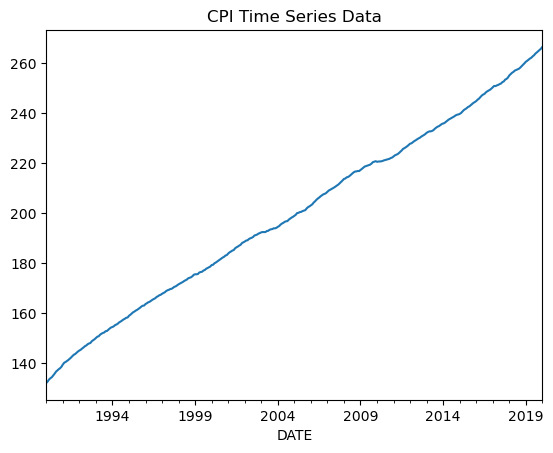

In [8]:
# Plot the time series data
data['CPI'].plot(title='CPI Time Series Data')
plt.show()

In [9]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error



# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit an autoregressive model on the training data
lag_order = 1  # Change this value based on the lag order you want to use
model = AutoReg(train_data['CPI'], lags=lag_order)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Evaluate the model using mean squared error
mse = mean_squared_error(test_data['CPI'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 26.431158749770002


/Users/prakharsoni/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CPI   No. Observations:                  288
Model:                     AutoReg(1)   Log Likelihood                 115.076
Method:               Conditional MLE   S.D. of innovations              0.162
Date:                Wed, 06 Dec 2023   AIC                           -224.152
Time:                        16:29:47   BIC                           -213.173
Sample:                    02-01-1990   HQIC                          -219.752
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6240      0.063      9.908      0.000       0.501       0.747
CPI.L1         0.9986      0.000   2998.717      0.000       0.998       0.999
                                    Roots           

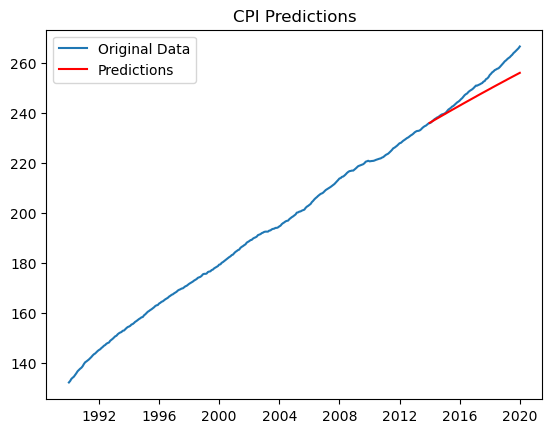

In [11]:
# Plot the original time series data and the predictions
plt.plot(data['CPI'], label='Original Data')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title('CPI Predictions')
plt.show()